# The Ames Housing dataset data quality analysis

This notebook demonstrates a project based on Housing Prices data.<br>
Data quality analysis was performed.<br>

## Requrements

For this notebook you following libraries must be installed:<br>
<b>pandas<br>
seaborn

## Get data

Data for work must be downloaded from the link and placed in a folder with notebook<br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## Examining metadata

The first step in data analysis is describing it. To do this, use the data provided from the site.

In [1]:
with open('data_description.txt') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Select columns with quantitative data

In [69]:
collQuen = ['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
            'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            'PoolArea', 'MiscVal']

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('test.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

I have reviewed the files and can now start performing the analysis.

## Compliance check

Most of the data are presented as categorical features. Using the example of several columns like "MSSubClass", "YearBuilt" and "MSZoning", I will compare the values in the column with the possible values in them

In [4]:
df['MSSubClass'].unique()

array([ 20,  60, 120, 160,  80,  30,  50,  90,  85, 190,  45,  70,  75,
       180,  40, 150], dtype=int64)

In [5]:
df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [6]:
print(df['YearBuilt'].max())
print(df['YearBuilt'].min())

2010
1879


The data matches the description and goes through this stage

## Finding Dublicates

Сheck the columns that must be unique

In [7]:
df['Id'].is_unique

True

Next, let's check for duplicates.

In [8]:
#all columns except ID
columnsToCheck = list(df.columns[1:])

In [9]:
df[df.duplicated(subset=columnsToCheck)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


The index is unique, the rest of the values are not repeated either

## Missing Data

Let's see which columns have empty values and how many

In [10]:
def MissingData(df):
    for column in df.columns:
        if df[column].isna().sum() != 0:
            print(column, df[column].isna().sum())

In [11]:
MissingData(df)

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


### Filling empty values

We can speculate about what to fill in the empty values. For example, let's take several values with a different number of empty values.

In [15]:
df['LotFrontage']

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [14]:
df['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [29]:
corr = df.corr()

x = corr[['LotFrontage']]
Mix.sort_values('LotFrontage', ascending=False).head(10)

,LotFrontage
LotFrontage,1.000000
LotArea,0.644608
1stFlrSF,0.461239
GarageArea,0.375581
GrLivArea,0.357125
TotRmsAbvGrd,0.344366
GarageCars,0.336373
TotalBsmtSF,0.315802
Fireplaces,0.257037
MasVnrArea,0.251533


In [33]:
df['LotFrontage'].isna().sum() / df['LotFrontage'].count()

0.18425324675324675

The missing data is limited to a small number of observations, so we can just eliminate those cases from the analysis.<br>

In [35]:
df['GarageFinish']

0       Unf
1       Unf
2       Fin
3       Fin
4       RFn
       ... 
1454    NaN
1455    Unf
1456    Unf
1457    NaN
1458    Fin
Name: GarageFinish, Length: 1459, dtype: object

In [44]:
print("Missing Data", df['GarageFinish'].isna().sum())
print(df['GarageFinish'].value_counts())

Missing Data 78
Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64


       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Missing values can be included in the analysis as separate values

### Find correlation between empty values

For example lets check correlation in missing data between columns where more than 30 missing values

In [55]:
def getCorrelationMissing(df, miss):
    firstColumn = []
    secondColumn = []
    correlationColumn = []
    checkedColumns = []
    for column in df.columns:
        checkedColumns.append(column)
        if df[column].isna().sum() > miss:
            for column2 in df.columns:
                if (df[column2].isna().sum() > miss) and (column2 not in checkedColumns):
                    firstColumn.append(column)
                    secondColumn.append(column2)
                    correlationColumn.append(df[column].isna().corr(df[column2].isna()))
    dfCorr = pd.DataFrame({'column1': firstColumn,
                           'second' : secondColumn,
                           'correlation' : correlationColumn})
    return dfCorr

In [56]:
getCorrelationMissing(df, 30).sort_values(['correlation'], ascending=False)

,column1,second,correlation
65,BsmtFinType1,BsmtFinType2,1.000000
110,GarageQual,GarageCond,1.000000
106,GarageFinish,GarageCond,1.000000
105,GarageFinish,GarageQual,1.000000
101,GarageYrBlt,GarageCond,1.000000
100,GarageYrBlt,GarageQual,1.000000
99,GarageYrBlt,GarageFinish,1.000000
95,GarageType,GarageCond,0.986382
94,GarageType,GarageQual,0.986382
93,GarageType,GarageFinish,0.986382


We examined where the data is missing and their correlation

## Correlation in data

In [19]:
import seaborn as sns

<AxesSubplot:>

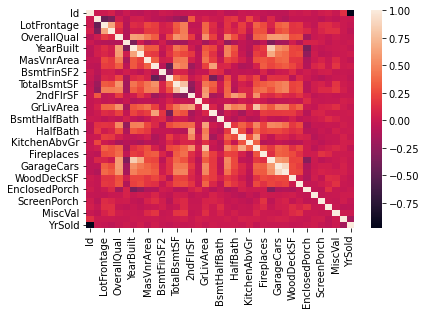

In [54]:
sns.heatmap(df.corr())

We can remove correlated features. If the correlation is 1, then one of the signs can be dropped. Also think about values above 0.9

## Dispersion in data

In [70]:
df[collQuen].std()

BsmtFinSF1       455.268042
BsmtFinSF2       176.753926
1stFlrSF         398.165820
2ndFlrSF         420.610226
LowQualFinSF      44.043251
GrLivArea        485.566099
GarageArea       217.048611
WoodDeckSF       127.744882
OpenPorchSF       68.883364
EnclosedPorch     67.227765
3SsnPorch         20.207842
ScreenPorch       56.609763
PoolArea          30.491646
MiscVal          630.806978
dtype: float64

If the variance of features is extremely small, then such features are not informative. But this is not our case

## Outliers in data

Next, check the numerical data (which in this sample is most often the area)

Firstly, we can manually view the maximum and minimum values and assess their accuracy

In [ ]:
df['LotArea'].sort_values(ascending=False)

If we see that there is an error in the data, then we can write an algorithm that removes 5% of the largest and smallest values

In [ ]:
q1 = df['LotArea'].quantile(q=0.95)

In [ ]:
q2 = df['LotArea'].quantile(q=0.05)

In [ ]:
df[df['LotArea'].between(q2, q1)]